In [4]:
import os
import pandas as pd
from pyannote.core import Segment, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

In [37]:
def txt2annotation(path_txt, annotation=Annotation()):
    #check if file is txt of csv
    if path_txt.endswith('.txt'):
        with open(path_txt, 'r') as f:
            for line in f:
                if len(line) == 0:
                    continue
                start, end, speaker = line.split()
                speaker = speaker.lower()
                annotation[Segment(float(start), float(end))] = speaker
            return annotation
    elif path_txt.endswith('.csv'):
        diarization = pd.read_csv(path_txt)
        for index, row in diarization.iterrows():
            start = row['start [s]']
            end = row['end [s]']
            speaker = row['speaker']
            annotation[Segment(float(start), float(end))] = speaker
        return annotation

# Primero, una prueba sencilla

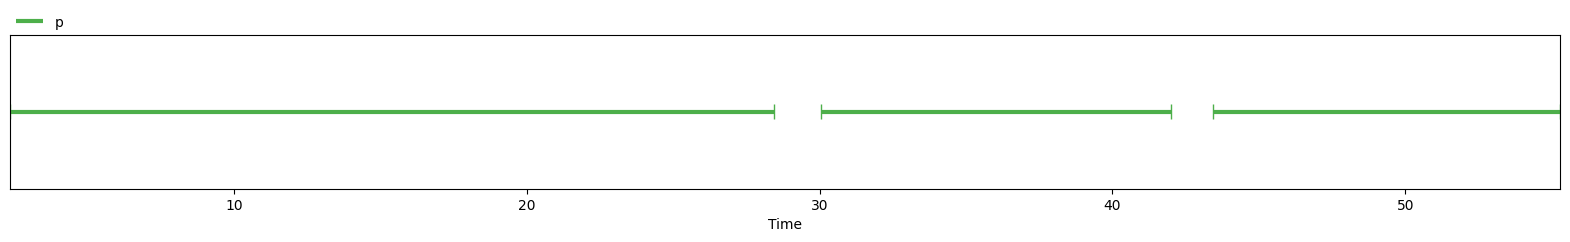

In [38]:
# reference annotation
reference_path = os.path.join('combined_database', 'reference', 'SG', 'CETRAM_AMG-0005_DescripcionDeDibujo1.txt')
reference = txt2annotation(reference_path, annotation=Annotation(uri='test'))
reference

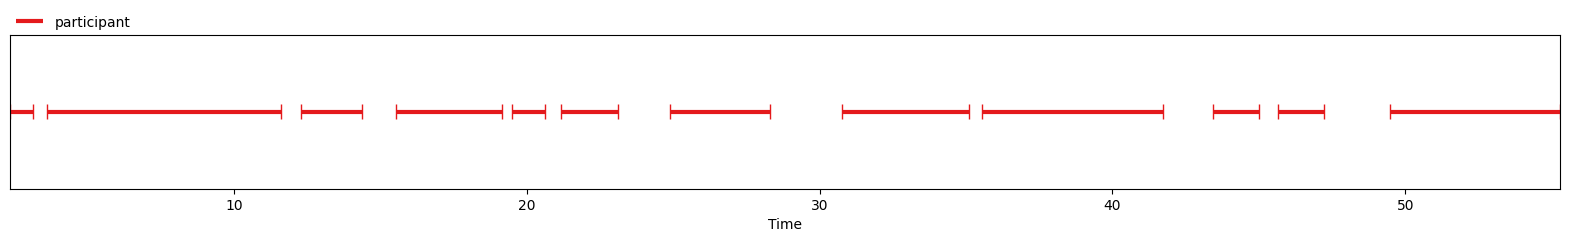

In [39]:
# reference annotation
reference_path = os.path.join('filtered_missed_detection', 'CETRAM_AMG-0005_DescripcionDeDibujo1_manual_participant_vad.csv')
reference = txt2annotation(reference_path, annotation=Annotation(uri='test'))
reference

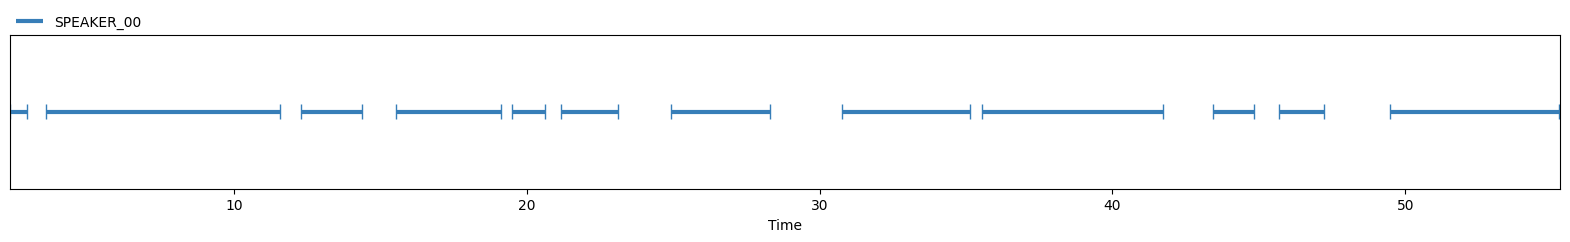

In [40]:
# hypothesis annotation
hypothesis_path = os.path.join('datasets', 'CETRAM_converted', 'diarization', 'CETRAM_AMG-0005_DescripcionDeDibujo1_diarization.csv')
hypothesis = txt2annotation(hypothesis_path, annotation=Annotation(uri='test'))
hypothesis

In [41]:
# DER
metric(reference, hypothesis, detailed=True)

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


{'missed detection': 0.5599999999999925,
 'total': 40.51,
 'false alarm': 1.8509999999999969,
 'correct': 39.949999999999996,
 'confusion': 0.0,
 'diarization error rate': 0.059516168847197966}

In [42]:
# full report and reset metric
report = metric.report(display=True)
report.to_csv('DER_report_hola.csv')
metric.reset()

      diarization error rate total correct correct false alarm false alarm missed detection missed detection confusion confusion
                           %                     %                       %                                 %                   %
item                                                                                                                            
test                    5.95 40.51   39.95   98.62        1.85        4.57             0.56             1.38      0.00      0.00
TOTAL                   5.95 40.51   39.95   98.62        1.85        4.57             0.56             1.38      0.00      0.00


# Ahora obtengamos un DER para todos los pares reference - hypothesis de la base combinada

In [52]:
# find all txt files in reference directory
metric.reset()
reference_dir = os.path.join('filtered_missed_detection')
reference_files = [f for f in os.listdir(reference_dir) if f.endswith('.csv')]
# os walk to find all txt files in reference directory
count = 0
for file in reference_files:
    try:
        reference_path = (os.path.join(reference_dir, file))
        annotation = Annotation(uri=file)
        reference = txt2annotation(reference_path, annotation)
        
        # find corresponding hypothesis file
        database = file.split('_')[0]
        hypothesis_file = file.replace('manual_participant_vad', 'diarization')
        #find corresponding hypothesis file
        hypothesis_path = os.path.join(f'datasets/{database}_converted/diarization', 
                                    hypothesis_file)
        annotation = Annotation(uri=file)
        hypothesis = txt2annotation(hypothesis_path, annotation)
        # # compute DER
        metric(reference, hypothesis, detailed=True)
    except FileNotFoundError:
        count += 1
        # write to file
        with open('missing_files_filtered_missed_detection.txt', 'a') as f:
            f.write(f'{hypothesis_file} not found\n')
# cumulative report
print(abs(metric))
report = abs(metric.report(display=True))
report.to_csv('DER_report_filtered_missed_detection.csv')
metric.reset() # reset metric for next iteration


[ 00:00:00.008 -->  00:00:00.093] _ SPEAKER_00
[ 00:00:00.093 -->  00:00:00.178] _ SPEAKER_01
[ 00:00:00.178 -->  00:00:00.331] _ SPEAKER_00
[ 00:00:12.759 -->  00:00:12.997] _ SPEAKER_02
[ 00:00:25.764 -->  00:00:27.733] _ SPEAKER_01
[ 00:00:31.791 -->  00:00:32.487] _ SPEAKER_00
[ 00:00:33.404 -->  00:00:34.491] _ SPEAKER_03
[ 00:00:33.523 -->  00:00:33.846] _ SPEAKER_00
[ 00:00:45.543 -->  00:00:47.886] _ SPEAKER_02
[ 00:00:48.039 -->  00:00:55.849] _ SPEAKER_02
[ 00:00:57.156 -->  00:00:57.258] _ SPEAKER_01
[ 00:00:57.937 -->  00:01:00.688] _ SPEAKER_02
[ 00:01:00.688 -->  00:01:01.282] _ SPEAKER_01
[ 00:01:00.705 -->  00:01:01.044] _ SPEAKER_02
[ 00:01:04.915 -->  00:01:07.920] _ SPEAKER_02
[ 00:01:08.379 -->  00:01:10.450] _ SPEAKER_02
[ 00:01:14.083 -->  00:01:14.864] _ SPEAKER_02
[ 00:01:17.462 -->  00:01:17.767] _ SPEAKER_02
[ 00:00:00.382 -->  00:00:01.078] _ SPEAKER_01
[ 00:00:01.587 -->  00:00:06.121] _ SPEAKER_01
[ 00:00:07.071 -->  00:00:09.363] _ SPEAKER_01
[ 00:00:09.77

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.399 -->  00:00:01.112] _ SPEAKER_00
[ 00:00:00.450 -->  00:00:00.806] _ SPEAKER_01
[ 00:00:01.604 -->  00:00:02.368] _ SPEAKER_00
[ 00:00:03.489 -->  00:00:04.338] _ SPEAKER_00
[ 00:00:05.849 -->  00:00:06.596] _ SPEAKER_00
[ 00:00:07.733 -->  00:00:08.735] _ SPEAKER_00
[ 00:00:09.516 -->  00:00:10.331] _ SPEAKER_00
[ 00:00:12.046 -->  00:00:13.081] _ SPEAKER_00
[ 00:00:15.696 -->  00:00:16.494] _ SPEAKER_00
[ 00:00:18.990 -->  00:00:19.703] _ SPEAKER_00
[ 00:00:29.160 -->  00:00:30.059] _ SPEAKER_00
[ 00:00:31.163 -->  00:00:31.808] _ SPEAKER_00
[ 00:00:36.426 -->  00:00:37.054] _ SPEAKER_00
[ 00:00:38.158 -->  00:00:38.922] _ SPEAKER_00
[ 00:00:44.949 -->  00:00:45.323] _ SPEAKER_01
[ 00:00:45.323 -->  00:00:45.424] _ SPEAKER_00
[ 00:00:45.424 -->  00:00:45.441] _ SPEAKER_01
[ 00:00:46.307 -->  00:00:52.368] _ SPEAKER_01
[ 00:00:48.735 -->  00:00:49.211] _ SPEAKER_00
[ 00:00:50.942 -->  00:00:51.587] _ SPEAKER_00
[ 00:00:59.092 -->  00:00:59.737] _ SPEAKER_00
[ 00:00:59.99

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.008 -->  00:00:04.100] _ SPEAKER_00
[ 00:00:04.610 -->  00:00:09.992] _ SPEAKER_00
[ 00:00:10.942 -->  00:00:13.065] _ SPEAKER_00
[ 00:00:21.587 -->  00:00:23.846] _ SPEAKER_00
[ 00:00:32.997 -->  00:00:37.020] _ SPEAKER_00
[ 00:00:33.302 -->  00:00:34.915] _ SPEAKER_01
[ 00:00:42.929 -->  00:00:43.455] _ SPEAKER_00
[ 00:00:44.372 -->  00:00:47.581] _ SPEAKER_00
[ 00:00:48.260 -->  00:00:50.212] _ SPEAKER_00
[ 00:00:51.570 -->  00:00:52.504] _ SPEAKER_00
[ 00:00:54.270 -->  00:00:58.447] _ SPEAKER_00
[ 00:01:00.552 -->  00:01:01.757] _ SPEAKER_00
[ 00:01:03.149 -->  00:01:06.239] _ SPEAKER_00
[ 00:01:06.952 -->  00:01:11.367] _ SPEAKER_00
[ 00:01:12.114 -->  00:01:12.827] _ SPEAKER_00
[ 00:01:14.049 -->  00:01:16.851] _ SPEAKER_00
[ 00:01:17.513 -->  00:01:18.854] _ SPEAKER_00
[ 00:01:20.161 -->  00:01:26.596] _ SPEAKER_00
[ 00:01:27.156 -->  00:01:28.107] _ SPEAKER_00
[ 00:01:28.413 -->  00:01:30.433] _ SPEAKER_00
[ 00:01:30.959 -->  00:01:32.946] _ SPEAKER_00
[ 00:01:35.81

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:04.966 -->  00:00:09.244] _ SPEAKER_00
[ 00:00:09.584 -->  00:00:10.110] _ SPEAKER_00
[ 00:00:10.722 -->  00:00:12.131] _ SPEAKER_00
[ 00:00:12.623 -->  00:00:13.744] _ SPEAKER_00
[ 00:00:14.219 -->  00:00:15.730] _ SPEAKER_00
[ 00:00:16.273 -->  00:00:18.599] _ SPEAKER_00
[ 00:00:19.058 -->  00:00:22.029] _ SPEAKER_00
[ 00:00:23.387 -->  00:00:26.596] _ SPEAKER_00
[ 00:00:27.071 -->  00:00:28.005] _ SPEAKER_00
[ 00:00:28.786 -->  00:00:31.384] _ SPEAKER_00
[ 00:00:31.706 -->  00:00:32.351] _ SPEAKER_00
[ 00:00:32.929 -->  00:00:34.236] _ SPEAKER_00
[ 00:00:34.593 -->  00:00:37.105] _ SPEAKER_00
[ 00:00:37.683 -->  00:00:43.183] _ SPEAKER_00
[ 00:00:43.370 -->  00:00:43.642] _ SPEAKER_00
[ 00:00:44.406 -->  00:00:44.610] _ SPEAKER_00
[ 00:00:45.000 -->  00:00:47.801] _ SPEAKER_00
[ 00:00:48.905 -->  00:00:52.046] _ SPEAKER_00
[ 00:00:52.182 -->  00:00:53.404] _ SPEAKER_00
[ 00:00:54.015 -->  00:00:55.221] _ SPEAKER_00
[ 00:00:55.577 -->  00:01:00.857] _ SPEAKER_00
[ 00:01:01.57

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.348 -->  00:00:02.250] _ SPEAKER_00
[ 00:00:04.576 -->  00:00:06.002] _ SPEAKER_00
[ 00:00:19.024 -->  00:00:22.012] _ SPEAKER_01
[ 00:00:01.112 -->  00:00:03.557] _ SPEAKER_00
[ 00:00:04.508 -->  00:00:05.781] _ SPEAKER_00
[ 00:00:06.817 -->  00:00:10.433] _ SPEAKER_00
[ 00:00:11.129 -->  00:00:13.421] _ SPEAKER_00
[ 00:00:13.591 -->  00:00:15.628] _ SPEAKER_00
[ 00:00:16.460 -->  00:00:18.362] _ SPEAKER_00
[ 00:00:19.295 -->  00:00:23.930] _ SPEAKER_00
[ 00:00:24.593 -->  00:00:25.611] _ SPEAKER_00
[ 00:00:26.800 -->  00:00:29.261] _ SPEAKER_00
[ 00:00:29.533 -->  00:00:32.233] _ SPEAKER_00
[ 00:00:33.098 -->  00:00:38.514] _ SPEAKER_00
[ 00:00:39.278 -->  00:00:43.370] _ SPEAKER_00
[ 00:00:43.795 -->  00:00:44.643] _ SPEAKER_00
[ 00:00:45.323 -->  00:00:48.209] _ SPEAKER_00
[ 00:00:48.990 -->  00:00:50.637] _ SPEAKER_00
[ 00:00:51.231 -->  00:00:52.980] _ SPEAKER_00
[ 00:00:53.183 -->  00:00:55.866] _ SPEAKER_00
[ 00:00:56.426 -->  00:00:56.885] _ SPEAKER_00
[ 00:00:57.47

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.195 -->  00:00:01.231] _ SPEAKER_04
[ 00:00:03.336 -->  00:00:03.795] _ SPEAKER_04
[ 00:00:04.304 -->  00:00:05.119] _ SPEAKER_04
[ 00:00:06.749 -->  00:00:07.462] _ SPEAKER_04
[ 00:00:10.840 -->  00:00:11.604] _ SPEAKER_04
[ 00:00:14.185 -->  00:00:15.662] _ SPEAKER_04
[ 00:00:15.951 -->  00:00:16.273] _ SPEAKER_04
[ 00:00:22.216 -->  00:00:24.643] _ SPEAKER_02
[ 00:00:29.550 -->  00:00:30.195] _ SPEAKER_03
[ 00:00:38.582 -->  00:00:40.246] _ SPEAKER_01
[ 00:00:49.075 -->  00:00:49.924] _ SPEAKER_00
[ 00:01:00.840 -->  00:01:01.808] _ SPEAKER_01
[ 00:01:02.878 -->  00:01:04.287] _ SPEAKER_03
[ 00:00:00.840 -->  00:00:02.742] _ SPEAKER_00
[ 00:00:04.406 -->  00:00:05.832] _ SPEAKER_00
[ 00:00:06.969 -->  00:00:08.022] _ SPEAKER_00
[ 00:00:09.024 -->  00:00:10.586] _ SPEAKER_00
[ 00:00:11.723 -->  00:00:13.540] _ SPEAKER_00
[ 00:00:15.374 -->  00:00:17.037] _ SPEAKER_00
[ 00:00:17.598 -->  00:00:23.608] _ SPEAKER_00
[ 00:00:25.730 -->  00:00:28.480] _ SPEAKER_00
[ 00:00:28.97

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:06.409 -->  00:00:07.071] _ SPEAKER_02
[ 00:00:08.345 -->  00:00:09.261] _ SPEAKER_02
[ 00:00:12.929 -->  00:00:15.526] _ SPEAKER_02
[ 00:00:17.173 -->  00:00:20.739] _ SPEAKER_02
[ 00:00:23.659 -->  00:00:24.542] _ SPEAKER_02
[ 00:00:25.492 -->  00:00:27.207] _ SPEAKER_02
[ 00:00:37.258 -->  00:00:39.244] _ SPEAKER_00
[ 00:00:57.309 -->  00:00:59.414] _ SPEAKER_03
[ 00:01:00.212 -->  00:01:01.655] _ SPEAKER_03
[ 00:01:03.234 -->  00:01:06.783] _ SPEAKER_02
[ 00:01:10.959 -->  00:01:13.591] _ SPEAKER_02
[ 00:01:15.594 -->  00:01:16.392] _ SPEAKER_02
[ 00:01:33.795 -->  00:01:37.716] _ SPEAKER_03
[ 00:01:40.552 -->  00:01:43.744] _ SPEAKER_01
[ 00:00:00.739 -->  00:00:08.294] _ SPEAKER_00
[ 00:00:09.380 -->  00:00:16.002] _ SPEAKER_00
[ 00:00:16.256 -->  00:00:19.601] _ SPEAKER_00
[ 00:00:20.688 -->  00:00:23.676] _ SPEAKER_00
[ 00:00:25.424 -->  00:00:27.581] _ SPEAKER_00
[ 00:00:27.767 -->  00:00:29.177] _ SPEAKER_00
[ 00:00:29.567 -->  00:00:32.487] _ SPEAKER_00
[ 00:00:00.46

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.433 -->  00:00:00.756] _ SPEAKER_00
[ 00:00:01.876 -->  00:00:03.964] _ SPEAKER_00
[ 00:00:04.491 -->  00:00:08.022] _ SPEAKER_00
[ 00:00:08.871 -->  00:00:12.301] _ SPEAKER_00
[ 00:00:14.117 -->  00:00:16.154] _ SPEAKER_00
[ 00:00:17.122 -->  00:00:19.567] _ SPEAKER_00
[ 00:00:20.840 -->  00:00:22.351] _ SPEAKER_00
[ 00:00:24.576 -->  00:00:25.798] _ SPEAKER_00
[ 00:00:27.139 -->  00:00:28.379] _ SPEAKER_00
[ 00:00:30.501 -->  00:00:33.540] _ SPEAKER_00
[ 00:00:34.864 -->  00:00:36.290] _ SPEAKER_00
[ 00:00:00.008 -->  00:00:00.399] _ SPEAKER_02
[ 00:00:04.032 -->  00:00:06.053] _ SPEAKER_01
[ 00:00:05.102 -->  00:00:05.306] _ SPEAKER_00
[ 00:00:05.390 -->  00:00:05.696] _ SPEAKER_00
[ 00:00:09.907 -->  00:00:12.657] _ SPEAKER_01
[ 00:00:13.659 -->  00:00:14.677] _ SPEAKER_01
[ 00:00:23.455 -->  00:00:25.374] _ SPEAKER_00
[ 00:00:34.813 -->  00:00:35.934] _ SPEAKER_02
[ 00:00:37.258 -->  00:00:37.801] _ SPEAKER_02
[ 00:00:37.937 -->  00:00:38.447] _ SPEAKER_02
[ 00:00:00.62

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and


[ 00:00:01.197 -->  00:00:02.419] _ SPEAKER_03
[ 00:00:03.710 -->  00:00:05.000] _ SPEAKER_02
[ 00:00:07.156 -->  00:00:10.263] _ SPEAKER_03
[ 00:00:11.893 -->  00:00:12.606] _ SPEAKER_03
[ 00:00:15.000 -->  00:00:15.883] _ SPEAKER_03
[ 00:00:19.058 -->  00:00:19.856] _ SPEAKER_03
[ 00:00:21.621 -->  00:00:23.761] _ SPEAKER_01
[ 00:00:25.034 -->  00:00:26.036] _ SPEAKER_01
[ 00:00:27.479 -->  00:00:27.733] _ SPEAKER_01
[ 00:00:29.686 -->  00:00:30.314] _ SPEAKER_01
[ 00:00:32.334 -->  00:00:32.708] _ SPEAKER_01
[ 00:00:35.272 -->  00:00:37.173] _ SPEAKER_00
[ 00:00:37.173 -->  00:00:38.990] _ SPEAKER_02
[ 00:00:41.214 -->  00:00:43.642] _ SPEAKER_02
[ 00:00:41.553 -->  00:00:41.587] _ SPEAKER_00
[ 00:00:48.260 -->  00:00:49.007] _ SPEAKER_02
[ 00:00:49.007 -->  00:00:49.024] _ SPEAKER_03
[ 00:00:49.024 -->  00:00:49.041] _ SPEAKER_02
[ 00:00:51.418 -->  00:00:51.944] _ SPEAKER_03
[ 00:00:55.577 -->  00:00:56.562] _ SPEAKER_03
[ 00:00:59.992 -->  00:01:00.297] _ SPEAKER_03
[ 00:00:00.0

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.008 -->  00:00:04.015] _ SPEAKER_00
[ 00:00:06.698 -->  00:00:08.294] _ SPEAKER_00
[ 00:00:10.654 -->  00:00:13.217] _ SPEAKER_00
[ 00:00:15.492 -->  00:00:16.307] _ SPEAKER_00
[ 00:00:17.784 -->  00:00:19.805] _ SPEAKER_00
[ 00:00:21.910 -->  00:00:22.980] _ SPEAKER_00
[ 00:00:24.864 -->  00:00:27.088] _ SPEAKER_00
[ 00:00:30.722 -->  00:00:31.995] _ SPEAKER_00
[ 00:00:34.321 -->  00:00:37.581] _ SPEAKER_00
[ 00:00:02.216 -->  00:00:04.270] _ SPEAKER_01
[ 00:00:06.630 -->  00:00:08.328] _ SPEAKER_01
[ 00:00:10.942 -->  00:00:11.655] _ SPEAKER_01
[ 00:00:13.744 -->  00:00:15.458] _ SPEAKER_00
[ 00:00:16.392 -->  00:00:17.632] _ SPEAKER_01
[ 00:00:20.772 -->  00:00:22.555] _ SPEAKER_01
[ 00:00:25.153 -->  00:00:25.934] _ SPEAKER_01
[ 00:00:28.073 -->  00:00:30.059] _ SPEAKER_01
[ 00:00:00.569 -->  00:00:01.248] _ SPEAKER_00
[ 00:00:02.080 -->  00:00:03.489] _ SPEAKER_01
[ 00:00:02.233 -->  00:00:02.368] _ SPEAKER_00
[ 00:00:02.674 -->  00:00:04.830] _ SPEAKER_00
[ 00:00:06.01

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.823 -->  00:00:07.003] _ SPEAKER_04
[ 00:00:07.801 -->  00:00:08.565] _ SPEAKER_04
[ 00:00:11.316 -->  00:00:11.553] _ SPEAKER_04
[ 00:00:15.407 -->  00:00:16.239] _ SPEAKER_04
[ 00:00:16.613 -->  00:00:18.667] _ SPEAKER_04
[ 00:00:20.127 -->  00:00:20.959] _ SPEAKER_03
[ 00:00:23.319 -->  00:00:23.336] _ SPEAKER_01
[ 00:00:23.336 -->  00:00:23.421] _ SPEAKER_03
[ 00:00:23.421 -->  00:00:23.693] _ SPEAKER_04
[ 00:00:23.693 -->  00:00:23.846] _ SPEAKER_01
[ 00:00:23.846 -->  00:00:23.879] _ SPEAKER_03
[ 00:00:28.311 -->  00:00:29.143] _ SPEAKER_01
[ 00:00:34.355 -->  00:00:34.966] _ SPEAKER_00
[ 00:00:36.817 -->  00:00:36.851] _ SPEAKER_01
[ 00:00:37.547 -->  00:00:38.175] _ SPEAKER_00
[ 00:00:43.217 -->  00:00:45.696] _ SPEAKER_02
[ 00:00:51.553 -->  00:00:51.570] _ SPEAKER_02
[ 00:00:51.570 -->  00:00:52.436] _ SPEAKER_04
[ 00:00:59.194 -->  00:00:59.975] _ SPEAKER_04
[ 00:00:02.267 -->  00:00:26.002] _ SPEAKER_00
[ 00:00:00.008 -->  00:00:01.825] _ SPEAKER_00
[ 00:00:04.13

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.280 -->  00:00:03.540] _ SPEAKER_04
[ 00:00:04.134 -->  00:00:04.168] _ SPEAKER_00
[ 00:00:04.168 -->  00:00:04.983] _ SPEAKER_04
[ 00:00:04.983 -->  00:00:05.000] _ SPEAKER_00
[ 00:00:06.477 -->  00:00:07.139] _ SPEAKER_00
[ 00:00:09.160 -->  00:00:09.788] _ SPEAKER_00
[ 00:00:13.098 -->  00:00:13.964] _ SPEAKER_00
[ 00:00:16.205 -->  00:00:17.207] _ SPEAKER_03
[ 00:00:17.207 -->  00:00:19.703] _ SPEAKER_00
[ 00:00:20.942 -->  00:00:21.621] _ SPEAKER_00
[ 00:00:25.407 -->  00:00:26.019] _ SPEAKER_02
[ 00:00:30.671 -->  00:00:31.384] _ SPEAKER_02
[ 00:00:32.759 -->  00:00:33.455] _ SPEAKER_02
[ 00:00:35.611 -->  00:00:36.154] _ SPEAKER_02
[ 00:00:38.973 -->  00:00:39.007] _ SPEAKER_04
[ 00:00:39.007 -->  00:00:39.499] _ SPEAKER_01
[ 00:00:40.416 -->  00:00:41.384] _ SPEAKER_01
[ 00:00:41.706 -->  00:00:43.455] _ SPEAKER_04
[ 00:00:42.351 -->  00:00:42.606] _ SPEAKER_01
[ 00:00:43.455 -->  00:00:44.066] _ SPEAKER_01
[ 00:00:45.645 -->  00:00:45.662] _ SPEAKER_01
[ 00:00:45.66

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.008 -->  00:00:00.535] _ SPEAKER_00
[ 00:00:02.623 -->  00:00:04.983] _ SPEAKER_00
[ 00:00:14.202 -->  00:00:16.698] _ SPEAKER_00
[ 00:00:17.428 -->  00:00:21.859] _ SPEAKER_00
[ 00:00:22.301 -->  00:00:24.610] _ SPEAKER_00
[ 00:00:25.068 -->  00:00:29.669] _ SPEAKER_00
[ 00:00:31.995 -->  00:00:32.317] _ SPEAKER_00
[ 00:00:33.896 -->  00:00:35.017] _ SPEAKER_00
[ 00:00:37.241 -->  00:00:37.988] _ SPEAKER_00
[ 00:00:38.667 -->  00:00:38.701] _ SPEAKER_00
[ 00:00:38.735 -->  00:00:42.912] _ SPEAKER_00
[ 00:00:45.543 -->  00:00:46.935] _ SPEAKER_00
[ 00:00:48.990 -->  00:00:50.127] _ SPEAKER_00
[ 00:00:51.197 -->  00:00:56.902] _ SPEAKER_00
[ 00:00:58.413 -->  00:01:07.139] _ SPEAKER_00
[ 00:01:08.345 -->  00:01:14.626] _ SPEAKER_00
[ 00:01:18.735 -->  00:01:21.808] _ SPEAKER_00
[ 00:01:23.676 -->  00:01:24.847] _ SPEAKER_00
[ 00:01:26.392 -->  00:01:29.126] _ SPEAKER_00
[ 00:00:01.503 -->  00:00:02.182] _ SPEAKER_00
[ 00:00:02.861 -->  00:00:07.292] _ SPEAKER_00
[ 00:00:08.43

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.789 -->  00:00:04.966] _ SPEAKER_00
[ 00:00:10.280 -->  00:00:12.012] _ SPEAKER_01
[ 00:00:13.048 -->  00:00:15.968] _ SPEAKER_01
[ 00:00:16.952 -->  00:00:17.581] _ SPEAKER_01
[ 00:00:18.107 -->  00:00:22.131] _ SPEAKER_01
[ 00:00:23.591 -->  00:00:25.798] _ SPEAKER_01
[ 00:00:26.800 -->  00:00:29.788] _ SPEAKER_01
[ 00:00:31.180 -->  00:00:33.913] _ SPEAKER_01
[ 00:00:34.915 -->  00:00:41.893] _ SPEAKER_01
[ 00:00:42.895 -->  00:00:44.049] _ SPEAKER_01
[ 00:00:45.951 -->  00:00:46.426] _ SPEAKER_01
[ 00:00:47.105 -->  00:00:48.345] _ SPEAKER_01
[ 00:00:48.803 -->  00:00:49.941] _ SPEAKER_01
[ 00:00:50.399 -->  00:00:54.491] _ SPEAKER_01
[ 00:00:59.703 -->  00:01:06.783] _ SPEAKER_00
[ 00:01:12.742 -->  00:01:14.049] _ SPEAKER_01
[ 00:01:14.491 -->  00:01:20.433] _ SPEAKER_01
[ 00:01:22.233 -->  00:01:25.221] _ SPEAKER_01
[ 00:01:26.698 -->  00:01:28.311] _ SPEAKER_01
[ 00:01:29.295 -->  00:01:30.874] _ SPEAKER_01
[ 00:01:34.185 -->  00:01:35.509] _ SPEAKER_01
[ 00:01:36.03

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

[ 00:00:00.263 -->  00:00:03.319] _ SPEAKER_01
[ 00:00:06.188 -->  00:00:07.071] _ SPEAKER_01
[ 00:00:08.684 -->  00:00:09.584] _ SPEAKER_01
[ 00:00:10.756 -->  00:00:11.638] _ SPEAKER_01
[ 00:00:12.623 -->  00:00:13.370] _ SPEAKER_01
[ 00:00:16.273 -->  00:00:17.615] _ SPEAKER_01
[ 00:00:18.226 -->  00:00:19.533] _ SPEAKER_01
[ 00:00:18.480 -->  00:00:19.312] _ SPEAKER_00
[ 00:00:22.827 -->  00:00:25.000] _ SPEAKER_01
[ 00:00:26.154 -->  00:00:28.158] _ SPEAKER_01
[ 00:00:28.480 -->  00:00:29.482] _ SPEAKER_01
[ 00:00:31.537 -->  00:00:32.165] _ SPEAKER_01
[ 00:00:32.912 -->  00:00:34.915] _ SPEAKER_01
[ 00:00:37.190 -->  00:00:37.750] _ SPEAKER_01
[ 00:00:41.180 -->  00:00:42.997] _ SPEAKER_01
[ 00:00:43.812 -->  00:00:44.100] _ SPEAKER_01
[ 00:00:44.100 -->  00:00:44.202] _ SPEAKER_00
[ 00:00:45.917 -->  00:00:46.783] _ SPEAKER_00
[ 00:00:45.934 -->  00:00:46.698] _ SPEAKER_01
[ 00:00:47.122 -->  00:00:47.835] _ SPEAKER_00
[ 00:00:48.396 -->  00:00:49.007] _ SPEAKER_00
[ 00:00:49.21

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

### Rename hypothesis files in case they have the _diarized suffix

In [33]:
# # change the name of files in
# # combined_database/hypothesis/XX, deleting the suffix "_diarization"

# find all txt files in hypothesis directory
# hypothesis_dir = os.path.join('combined_database', 'hypothesis', 'AS')
# for f in os.listdir(hypothesis_dir):
#     if f.endswith('_diarization.txt'):
#         os.rename(os.path.join(hypothesis_dir, f), os.path.join(hypothesis_dir, f.replace('_diarization', '')))